In [1]:
import json
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cmasher as cmr
import seaborn as sns
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns
from mplsoccer import (VerticalPitch, Pitch, create_transparent_cmap,
                       FontManager, arrowhead_marker)
from matplotlib.patches import Arc
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
import matplotlib.image as image
from matplotlib.colors import (to_rgba, LinearSegmentedColormap)
import matplotlib.patheffects as path_effects
from scipy.ndimage import gaussian_filter



from PIL import Image
from mplsoccer import Pitch, VerticalPitch, add_image

from scipy.ndimage import gaussian_filter
from matplotlib.colors import ListedColormap

from highlight_text import fig_text
from bs4 import BeautifulSoup

from mplsoccer.cm import create_transparent_cmap
from mplsoccer.scatterutils import arrowhead_marker
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from mplsoccer.utils import FontManager
from matplotlib.patches import Arc

URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [2]:
cHome = '#6CABDD'
cAway = '#034694'
pHome = 'mancity.png'
pAway = 'chelsea.png'
comp = 'FA Cup'
stage = 'Round 3'
venue = ' Etihad Stadium'
date = '08/01/2023'

In [10]:
with open('chelseaFA.json',encoding = "utf8") as f:
    data = json.load(f)

df = pd.json_normalize(data['events'], sep = '_')

In [11]:
team_dict  = {
    data['home']['teamId']: data['home']['name'],
    data['away']['teamId']: data['away']['name']
}

player = data['home']['players'] + data['away']['players']
player_dict = {}

for i in player:
    player_dict[i['playerId']] = i['name']
    
df_player = df[df.isTouch == True]
foul_ids = df_player[df_player.playerId.isnull()].index.tolist()
df_player = df_player.drop(foul_ids)
df_player['team_name'] = df_player.teamId.apply(lambda x: team_dict[x])
df_player['player_name'] = df_player.playerId.apply(lambda x: player_dict[x])

# Touches

In [12]:
touches_df = df[df.isTouch == True]
foul_ids = touches_df[touches_df.playerId.isnull()].index.tolist()
touches_df = touches_df.drop(foul_ids)
touches_df['team_name'] = touches_df.teamId.apply(lambda x: team_dict[x])
touches_df['player_name'] = touches_df.playerId.apply(lambda x: player_dict[x])

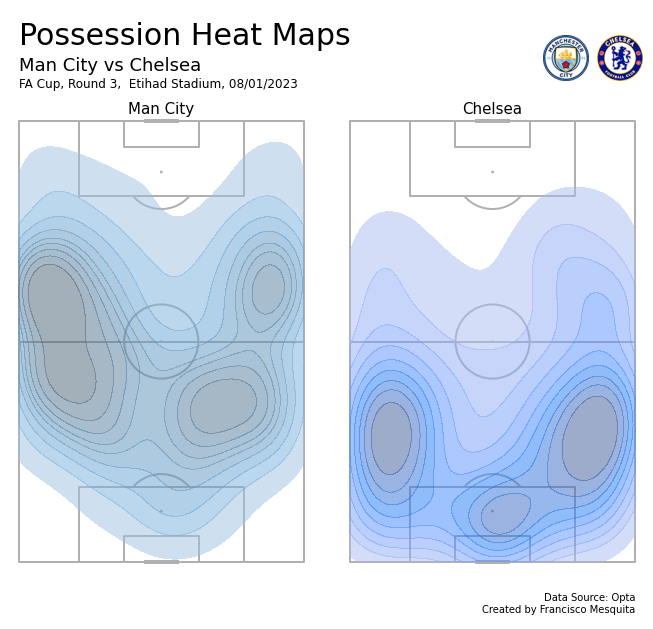

In [13]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = touches_df[touches_df.team_name == data['home']['name']]
pitch.kdeplot(home.x, home.y, shade = True, alpha = 0.5, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

away = touches_df[touches_df.team_name == data['away']['name']]
pitch.kdeplot(away.x, away.y, shade = True, alpha = 0.5, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.7, 'Possession Heat Maps', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

(-0.5, 69.5, 69.5, -0.5)

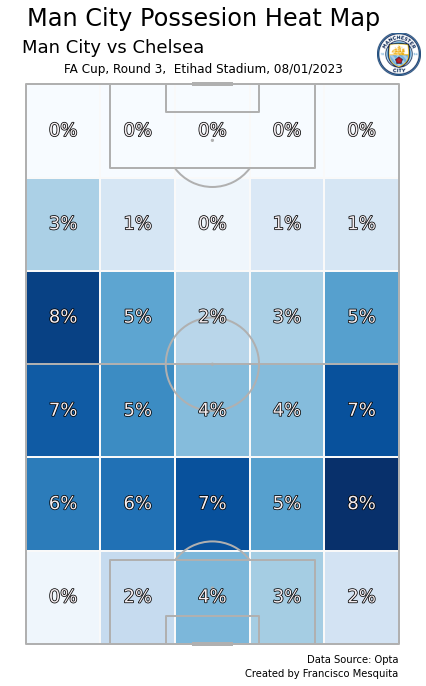

In [14]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

pitch = VerticalPitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (6, 10))
fig.set_facecolor("white")

city = touches_df[touches_df.team_name == data['home']['name']]
#city = touches_df[touches_df.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(city.x, city.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Blues', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.48, y = .98, s = 'Man City Possesion Heat Map', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.27, y = .94, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.48, y = .91, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(.93, 0.09, 'Data Source: Opta', va = 'center', ha = 'right')
legend2 = fig.text(.93, 0.07, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

imHD = plt.imread('mancity.png') # insert local path of the image.
newaxHD = fig.add_axes([0.88, 0.9, 0.1, 0.06], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

(-0.5, 69.5, 69.5, -0.5)

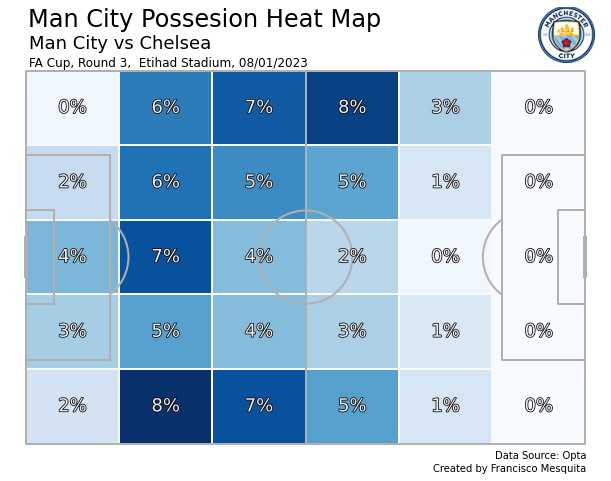

In [22]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

pitch = Pitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (10, 6))
fig.set_facecolor("white")

city = touches_df[touches_df.team_name == data['home']['name']]
#city = touches_df[touches_df.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(city.x, city.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Blues', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.36, y = 1.05, s = 'Man City Possesion Heat Map', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.242, y = .995, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.31, y = .95, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(.89, 0.04, 'Data Source: Opta', va = 'center', ha = 'right')
legend2 = fig.text(.89, 0.01, 'Created by Francisco Mesquita', va = 'center', ha = 'right')

imHD = plt.imread('mancity.png') # insert local path of the image.
newaxHD = fig.add_axes([0.8, 0.95, 0.1, 0.13], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

# Passing/Possession

In [23]:
pass_data = df[df.type_displayName == 'Pass'].reset_index()
pass_data['team_name'] = pass_data.teamId.apply(lambda x: team_dict[x])
pass_data['player_name'] = pass_data.playerId.apply(lambda x: player_dict[x])

def is_atk_third(data):
    if data.endX > 66.6 and data.x <= 66.6:
        return True
    else:
        return False

def at_atk_third(data):
    if data.x > 66.6 and data.endX > 66.6:
        return True
    else:
        return False

pass_data['to_atk_third'] = pass_data.apply(lambda x: is_atk_third(x), axis=1)
pass_data['at_atk_third'] = pass_data.apply(lambda x: at_atk_third(x), axis=1)

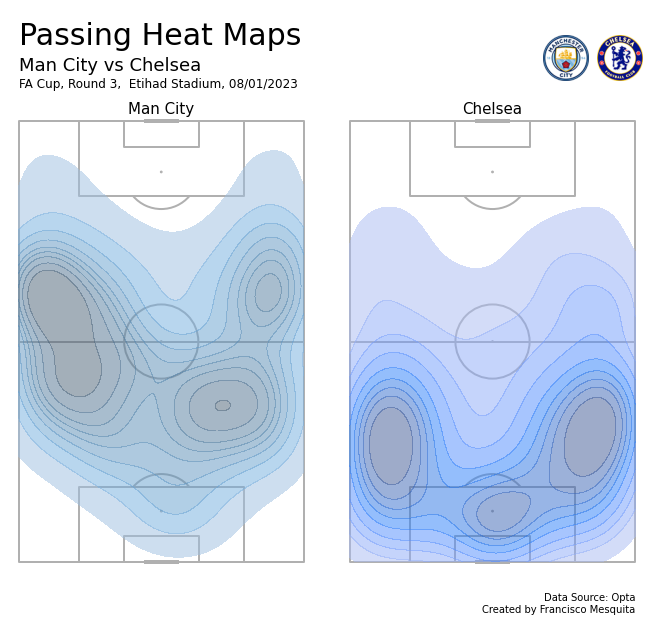

In [24]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = pass_data[pass_data.team_name == data['home']['name']]
pitch.kdeplot(home.x, home.y, shade = True, alpha = 0.5, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

away = pass_data[pass_data.team_name == data['away']['name']]
pitch.kdeplot(away.x, away.y, shade = True, alpha = 0.5, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.7, 'Passing Heat Maps', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

(-0.5, 69.5, 69.5, -0.5)

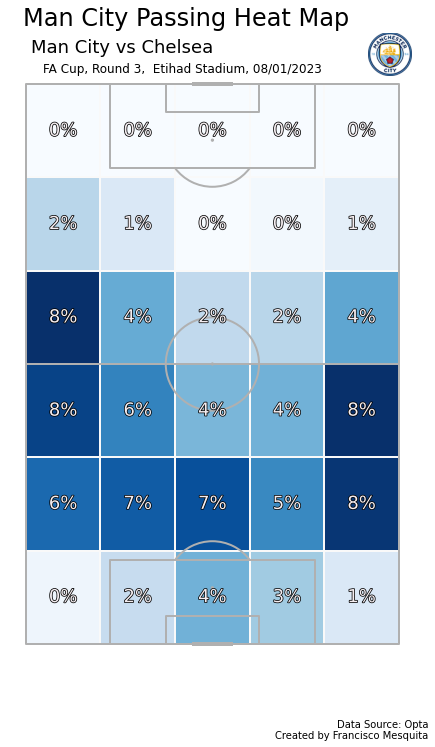

In [25]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

city = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]

pitch = VerticalPitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (6, 10))
fig.set_facecolor("white")
bin_statistic = pitch.bin_statistic(city.x, city.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Blues', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.44, y = .98, s = 'Man City Passing Heat Map', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.29, y = .94, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.43, y = .91, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(1, 0, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
legend2 = fig.text(1, -0.015, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

imHD = plt.imread('mancity.png') # insert local path of the image.
newaxHD = fig.add_axes([0.86, 0.9, 0.1, 0.06], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

(-0.5, 69.5, 69.5, -0.5)

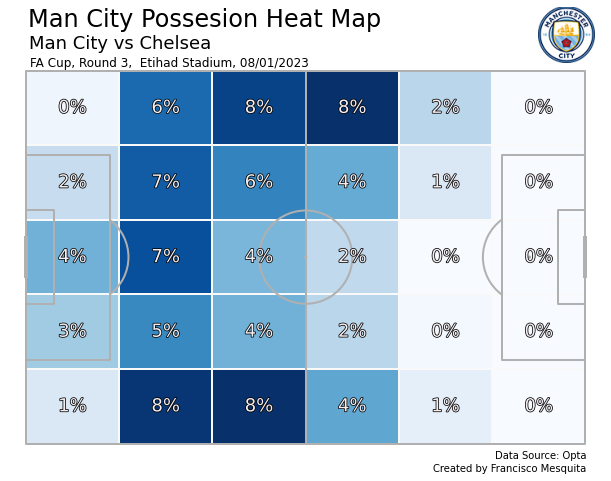

In [29]:
plt.rcParams["figure.figsize"] = [5.00, 1.50]
plt.rcParams["figure.autolayout"] = True

# path effects
path_eff = [path_effects.Stroke(linewidth = 1.5, foreground = 'black'),
            path_effects.Normal()]

city = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]

pitch = Pitch(pitch_type = 'statsbomb', line_zorder = 2, pitch_color = 'white')
fig, ax = pitch.draw(figsize = (10, 6))
fig.set_facecolor("white")
bin_statistic = pitch.bin_statistic(city.x, city.y, statistic = 'count', bins = (6, 5), normalize = True)
pitch.heatmap(bin_statistic, ax = ax, cmap = 'Blues', edgecolor = '#f9f9f9')
labels = pitch.label_heatmap(bin_statistic, color = '#f4edf0', fontsize = 18,
                             ax = ax, ha = 'center', va = 'center',
                             str_format = '{:.0%}', path_effects = path_eff)

title1 = fig.text(x = 0.36, y = 1.05, s = 'Man City Possesion Heat Map', va = 'center', ha = 'center',
                  size = 24, color = 'black')
title2 = fig.text(x = 0.242, y = .995, s = data['home']['name'] + ' vs ' + data['away']['name'], va = 'center', ha = 'center',
                  size = 18, color = 'black')
title3 = fig.text(x = 0.311, y = .95, s = comp + ', ' + stage + ', ' + venue + ', ' + date, va = 'center', ha = 'center',
                  size = 12, color = 'black')

legend1 = fig.text(.89, 0.04, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
legend2 = fig.text(.89, 0.01, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

imHD = plt.imread('mancity.png') # insert local path of the image.
newaxHD = fig.add_axes([0.8, 0.95, 0.1, 0.13], anchor= 'NE', zorder = 1)
newaxHD.imshow(imHD)
newaxHD.axis('off')

Man City had 50 Passes to the Attacking 3rd
Chelsea had 30 Passes to the Attacking 3rd


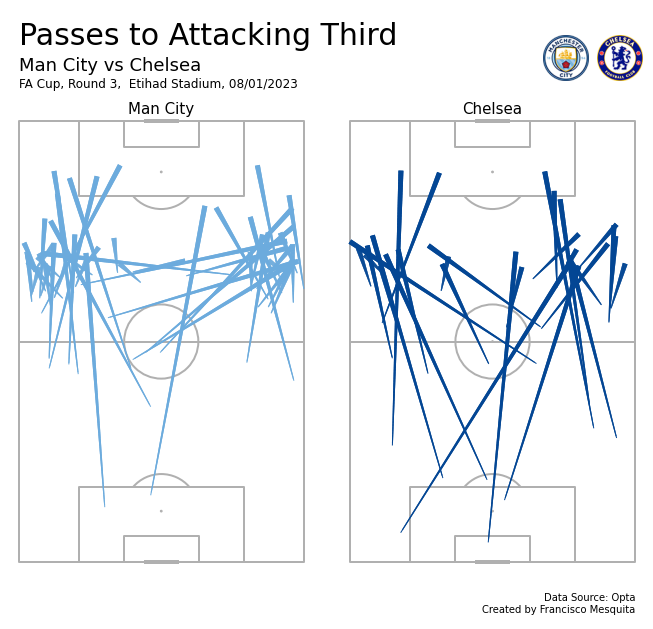

In [30]:
pitch = VerticalPitch(pitch_type = 'opta', half = False)
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

pass_atk = pass_data[pass_data.to_atk_third == True]

home = pass_atk[pass_atk.team_name == data['home']['name']]
home_Total = home[home.columns[0]].count()
print(data['home']['name'] + ' had ' + str(home_Total) + ' Passes to the Attacking 3rd')
pitch.lines(home.x, home.y, home.endX, home.endY, comet = True, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], fontsize = 15, va = 'center', ha = 'center', color = 'black')

away = pass_atk[pass_atk.team_name == data['away']['name']]
away_Total = away[away.columns[0]].count()
print(data['away']['name'] + ' had ' + str(away_Total) + ' Passes to the Attacking 3rd')
pitch.lines(away.x, away.y, away.endX, away.endY, comet = True, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], fontsize = 15, va = 'center', ha = 'center', color = 'black')

ax['title'].text(0, 0.7, 'Passes to Attacking Third', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

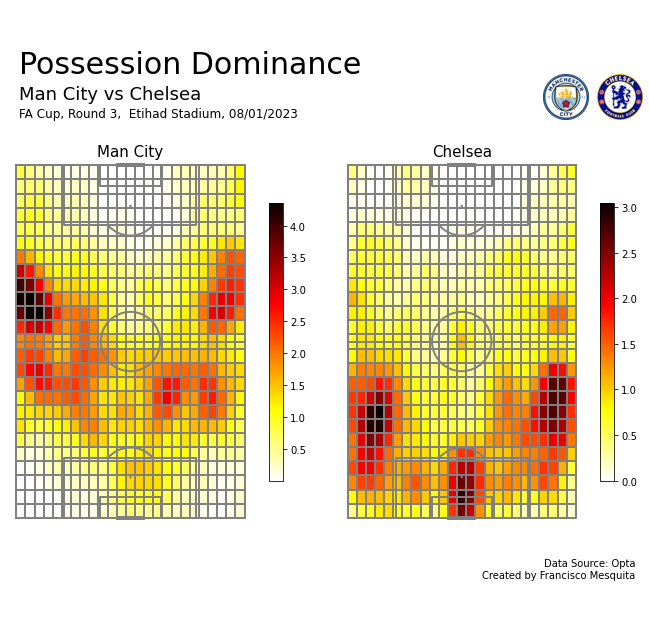

In [31]:
#cmap = ListedColormap(['white', '#', '#FC5C00','#FC3200', '#FC0000'])

pitch = VerticalPitch(pitch_type = 'opta', line_color = 'gray')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

# Home Team
home = pass_data[pass_data.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic = 'count', bins = (25, 25))#, normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax = ax['pitch'][0], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(hm, ax = ax['pitch'][0], shrink = 0.6)
ax['pitch'][0].text(50, 104, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

# Away Team
away = pass_data[pass_data.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = (25, 25))#, normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

am = pitch.heatmap(bin_statistic, ax = ax['pitch'][1], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(am, ax = ax['pitch'][1], shrink = 0.6)
ax['pitch'][1].text(50, 104, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.4, 'Possession Dominance', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.1, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.8, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.8, width = 0.07, height = 0.07)

ax['endnote'].text(1, 1.4, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 1.1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Average Position

In [32]:
avg_pos = pass_data[['team_name', 'player_name', 'minute', 'x', 'y', 'endX', 'endY']].groupby(
    ['team_name', 'player_name']).agg({'minute': [np.max, np.min], 'x': np.mean, 'y': np.mean}).reset_index().reset_index()
avg_pos.columns = [' '.join(col).strip() for col in avg_pos.columns.values]
avg_pos['mins_played'] = avg_pos['minute amax'] - avg_pos['minute amin']

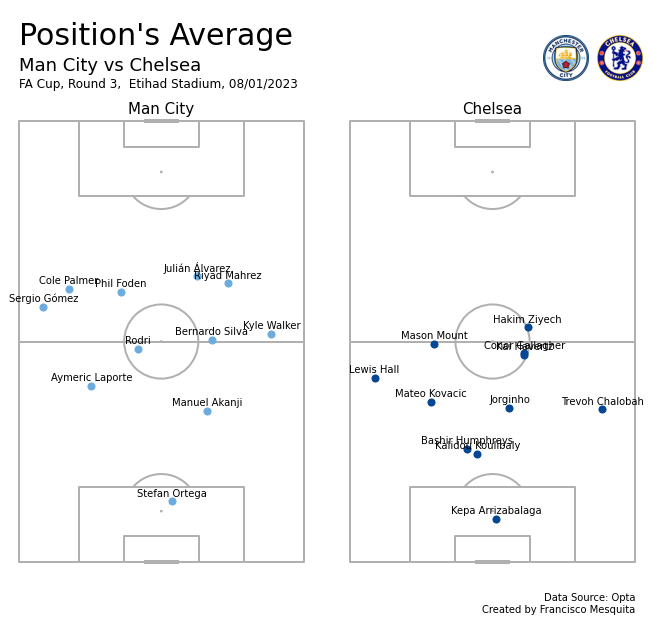

In [33]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, ax = pitch.grid(ncols = 2, axis = False)
fig.set_facecolor("white")

home = avg_pos[avg_pos.team_name == data['home']['name']]
home = home.sort_values('mins_played', ascending = False).iloc[:11, :]
pitch.scatter(home['x mean'], home['y mean'], s = 50, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

for i, d in home.iterrows():
    pitch.annotate(d['player_name'], (d['x mean'] + 2, d['y mean']), 
                   va = 'center', ha = 'center', ax = ax['pitch'][0], color = 'black')

away = avg_pos[avg_pos.team_name == data['away']['name']]
away = away.sort_values('mins_played', ascending = False).iloc[:11, :]
pitch.scatter(away['x mean'], away['y mean'], s = 50, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

for i, d in away.iterrows():
    pitch.annotate(d['player_name'], (d['x mean'] + 2, d['y mean']), 
                   va = 'center', ha = 'center', ax = ax['pitch'][1], color = 'black')

ax['title'].text(0, 0.7, 'Position\'s Average', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Passing Network

In [35]:
team = pass_data.team_name.values.tolist()
passer = pass_data.player_name.values.tolist()
receiver = pass_data.player_name.shift(-1).tolist()
team_receiver = pass_data.team_name.shift(-1).tolist()
pass_outcome = pass_data.outcomeType_displayName.values.tolist()
x = pass_data.x.values.tolist()
y = pass_data.y.values.tolist()

pass_net_df = pd.DataFrame({
    'team': team,
    'team_receiver': team_receiver,
    'passer': passer,
    'receiver': receiver,
    'pass_outcome': pass_outcome,
    'x': x,
    'y': y
})

pass_net_df = pass_net_df[pass_net_df.pass_outcome == 'Successful']
pass_net_df = pass_net_df[pass_net_df.team == pass_net_df.team_receiver]
pass_net_df['id'] = pass_net_df['passer'] + pass_net_df['receiver']

pass_pair_df = pass_net_df[['passer', 'receiver', 'pass_outcome']].groupby(['passer', 'receiver']).count().reset_index()
pass_pair_df['id'] = pass_pair_df['passer'] + pass_pair_df['receiver']
pass_pair_df = pass_pair_df.sort_values('pass_outcome', ascending = False)

pass_pair_df.head()

# Retrieve Top 11 Players
top_11_home = avg_pos[avg_pos.team_name == data['home']['name']].sort_values('mins_played', 
                ascending = False).player_name.tolist()[:11]
top_11_away = avg_pos[avg_pos.team_name == data['away']['name']].sort_values('mins_played', 
                ascending = False).player_name.tolist()[:11]

# Filter the data
avg_pos_11 = avg_pos[avg_pos.player_name.isin(top_11_home + top_11_away)].reset_index(drop = True)
avg_pos_11 = avg_pos_11.drop(['index', 'minute amax', 'minute amin', 'mins_played'], axis = 1)

pass_merge = pass_pair_df.merge(avg_pos_11, left_on = 'passer', right_on = 'player_name',)
pass_merge = pass_merge.rename({'x mean': 'x', 'y mean': 'y'}, axis = 'columns')
pass_merge = pass_merge.merge(avg_pos_11, left_on = 'receiver', right_on = 'player_name',)
pass_merge = pass_merge.rename({'x mean': 'x_end', 'y mean': 'y_end'}, axis = 'columns')
pass_merge = pass_merge.drop(['player_name_x', 'team_name_y', 'id', 'player_name_y'], axis = 1)
pass_merge = pass_merge.rename({'team_name_x': 'team_name'}, axis = 'columns')

In [103]:
pass_pair_df.head(50)

,passer,receiver,pass_outcome,id
19,Bashir Humphreys,Kepa Arrizabalaga,25,Bashir HumphreysKepa Arrizabalaga
169,Manuel Akanji,Kyle Walker,21,Manuel AkanjiKyle Walker
146,Kyle Walker,Manuel Akanji,19,Kyle WalkerManuel Akanji
133,Kepa Arrizabalaga,Bashir Humphreys,17,Kepa ArrizabalagaBashir Humphreys
114,Kalidou Koulibaly,Bashir Humphreys,17,Kalidou KoulibalyBashir Humphreys
148,Kyle Walker,Riyad Mahrez,17,Kyle WalkerRiyad Mahrez
18,Bashir Humphreys,Kalidou Koulibaly,15,Bashir HumphreysKalidou Koulibaly
138,Kepa Arrizabalaga,Kalidou Koulibaly,15,Kepa ArrizabalagaKalidou Koulibaly
233,Stefan Ortega,Aymeric Laporte,15,Stefan OrtegaAymeric Laporte
10,Aymeric Laporte,Sergio Gómez,15,Aymeric LaporteSergio Gómez


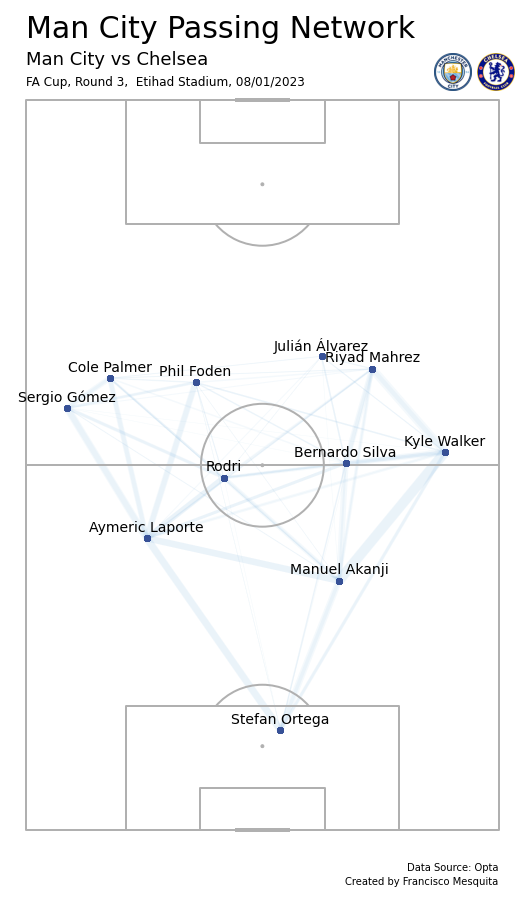

In [39]:
pitch = VerticalPitch(pitch_type = 'opta')

fig, ax = pitch.grid(figheight = 13, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)

fig.set_facecolor("white")

city = pass_merge[pass_merge.team_name == data['home']['name']]
#city = pass_merge[pass_merge.team_name == data['away']['name']]

pitch.lines(city.x, city.y, city.x_end, city.y_end, color = cHome, 
            linewidth = city.pass_outcome * 0.5, alpha = 0.07, 
            zorder = 0, ax = ax['pitch'])
pitch.scatter(city.x, city.y, color = '#375197', ax = ax['pitch'])

for i, d in city[['passer', 'x', 'y']].drop_duplicates().iterrows():
    pitch.annotate(d.passer, (d.x + 1.5, d.y), ax = ax['pitch'], va = 'center', ha = 'center', size = 14, color = 'black')

ax['title'].text(0, 0.7, 'Man City Passing Network', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha ='left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

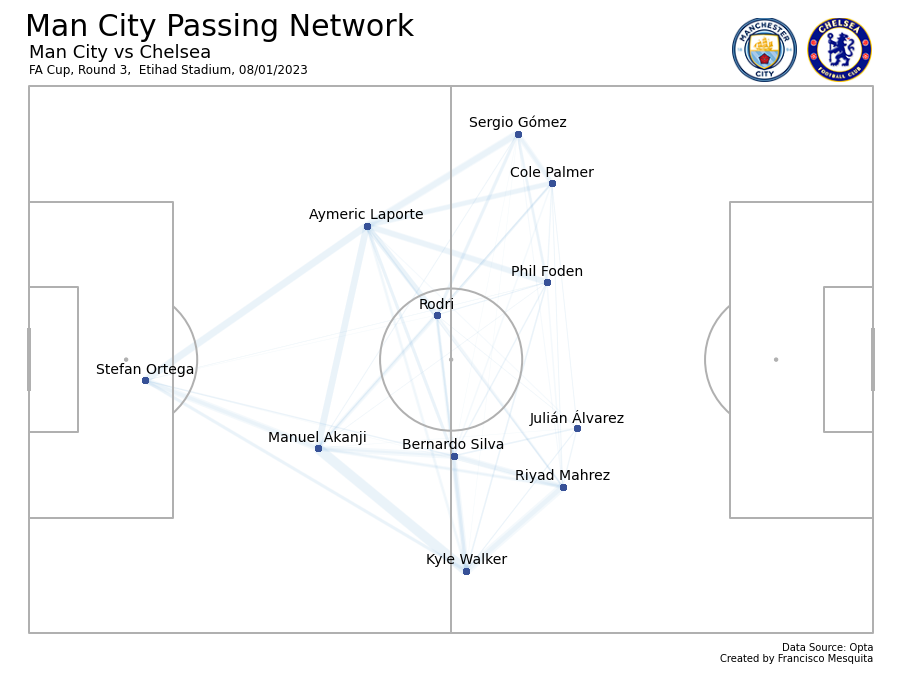

In [46]:
pitch = Pitch(pitch_type = 'opta')

fig, ax = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)

fig.set_facecolor("white")

city = pass_merge[pass_merge.team_name == data['home']['name']]
#city = pass_merge[pass_merge.team_name == data['away']['name']]

pitch.lines(city.x, city.y, city.x_end, city.y_end, color = cHome, 
            linewidth = city.pass_outcome * 0.5, alpha = 0.07, 
            zorder = 0, ax = ax['pitch'])
pitch.scatter(city.x, city.y, color = '#375197', ax = ax['pitch'])

for i, d in city[['passer', 'x', 'y']].drop_duplicates().iterrows():
    pitch.annotate(d.passer, (d.x, d.y + 2.), ax = ax['pitch'], va = 'center', ha = 'center', size = 14, color = 'black')

ax['title'].text(-.005, 0.65, 'Man City Passing Network', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha ='left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

ax['endnote'].text(1, 1.2, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.9, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Progressive Passes

In [47]:
pass_data['begin'] = pass_data.apply(lambda x: np.sqrt((100 - x['x']) ** 2 + (50 - x['y'])), axis = 1)
pass_data['end'] = pass_data.apply(lambda x: np.sqrt((100 - x['endX']) ** 2 + (50 - x['endY'])), axis = 1)
pass_data['progressive'] = pass_data.apply(lambda x: True if x.end / x.begin < .75 else False, axis = 1)

pass_prog = pass_data[pass_data.progressive == True]
home = pass_prog[pass_prog.team_name == data['home']['name']]
home_Total = home[home.columns[0]].count()
print(data['home']['name'] + ' had ' + str(home_Total) + ' Progressive Passes')
home_succ = home[home.outcomeType_displayName == 'Successful']

away = pass_prog[pass_prog.team_name == data['away']['name']]
away_Total = away[away.columns[0]].count()
print(data['away']['name'] + ' had ' + str(away_Total) + ' Progressive Passes')
away_succ = away[away.outcomeType_displayName == 'Successful']

Man City had 77 Progressive Passes
Chelsea had 69 Progressive Passes


Man City had 55 Successfull Progressive Passes
Chelsea had 45 Successfull Progressive Passes


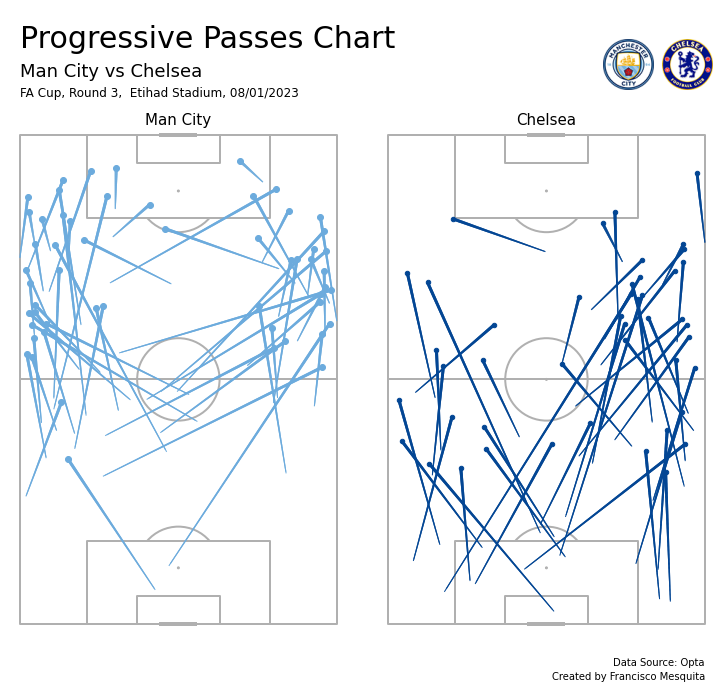

In [48]:
pitch = VerticalPitch(pitch_type = 'opta', line_zorder = 0)
fig, ax = pitch.grid(ncols = 2, axis = False, figheight = 10)
fig.set_facecolor("white")

home = pass_prog[pass_prog.team_name == data['home']['name']]
home_succ = home[home.outcomeType_displayName == 'Successful']
home_succ_Total = home_succ[home_succ.columns[0]].count()
print(data['home']['name'] + ' had ' + str(home_succ_Total) + ' Successfull Progressive Passes')

pitch.lines(home_succ.x, home_succ.y, home_succ.endX, home_succ.endY, 
            comet = True, linewidth = 3, ax = ax['pitch'][0], color = cHome)
pitch.scatter(home_succ.endX, home_succ.endY, ax = ax['pitch'][0], color = cHome)
ax['pitch'][0].text(50, 103, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

away = pass_prog[pass_prog.team_name == data['away']['name']]
away_succ = away[away.outcomeType_displayName == 'Successful']
away_succ_Total = away_succ[away_succ.columns[0]].count()
print(data['away']['name'] + ' had ' + str(away_succ_Total) + ' Successfull Progressive Passes')

pitch.lines(away_succ.x, away_succ.y, away_succ.endX, away_succ.endY, 
            comet = True, linewidth = 3, ax = ax['pitch'][1], color = cAway)
pitch.scatter(away_succ.endX, away_succ.endY, s = 20, ax = ax['pitch'][1], color = cAway)
ax['pitch'][1].text(50, 103, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.7, 'Progressive Passes Chart', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.4, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.86, width = 0.07, height = 0.07)

ax['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Pass Flow

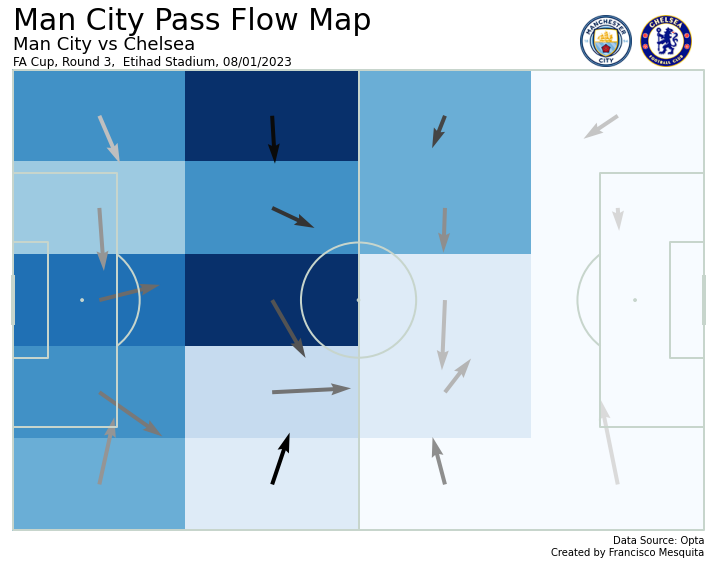

In [52]:
pitch = Pitch(pitch_type = 'statsbomb', pad_bottom = 1, pad_top = 1, pad_left = 1, pad_right = 1,
              line_zorder = 2, line_color = '#c7d5cc', pitch_color = 'white')
fig, axs = pitch.grid(figheight = 8, endnote_height = 0.03, endnote_space = 0,
                      title_height = 0.1, title_space = 0, grid_height = 0.82,
                      axis = False)

city = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]

bins = (4, 5)

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = bins)
hm = pitch.heatmap(bs_heatmap, ax = axs['pitch'], cmap = 'Blues')
grey = LinearSegmentedColormap.from_list('custom cmap', ['#DADADA', 'black'])
fm = pitch.flow(city.x, city.y, city.endX, city.endY,
                cmap = grey, arrow_type = 'scale', arrow_length = 15, bins = bins, ax = axs['pitch'])

axs['title'].text(0, 0.75, 'Man City Pass Flow Map', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0.05, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha ='left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

axs['endnote'].text(1, .8, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

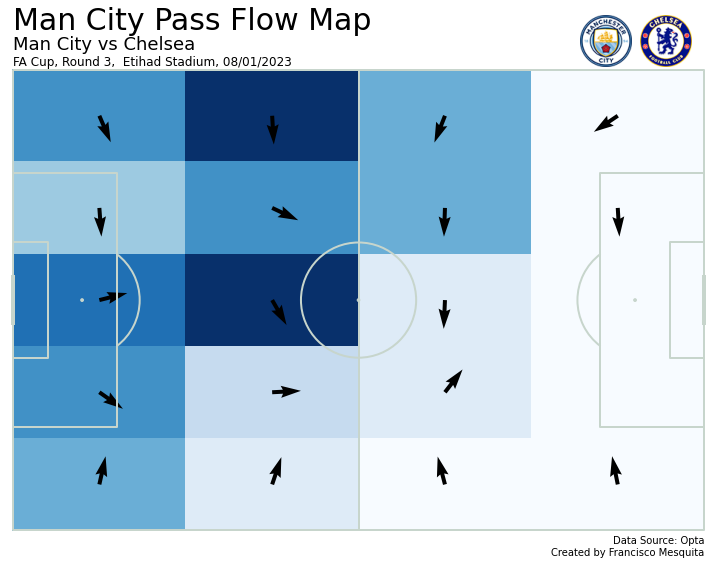

In [54]:
pitch = Pitch(pitch_type = 'statsbomb', pad_bottom = 1, pad_top = 1, pad_left = 1, pad_right = 1,
              line_zorder = 2, line_color = '#c7d5cc', pitch_color = 'white')
fig, axs = pitch.grid(figheight = 8, endnote_height = 0.03, endnote_space = 0,
                      title_height = 0.1, title_space = 0, grid_height = 0.82,
                      axis = False)

city = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]

bins = (4, 5)

# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = bins)
hm = pitch.heatmap(bs_heatmap, ax = axs['pitch'], cmap = 'Blues')
fm = pitch.flow(city.x, city.y, city.endX, city.endY,
                color = 'black', arrow_type = 'same', arrow_length = 5, bins = bins, ax = axs['pitch'])

axs['title'].text(0, 0.75, 'Man City Pass Flow Map', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0.05, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha ='left', fontsize = 12, color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

axs['endnote'].text(1, .8, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

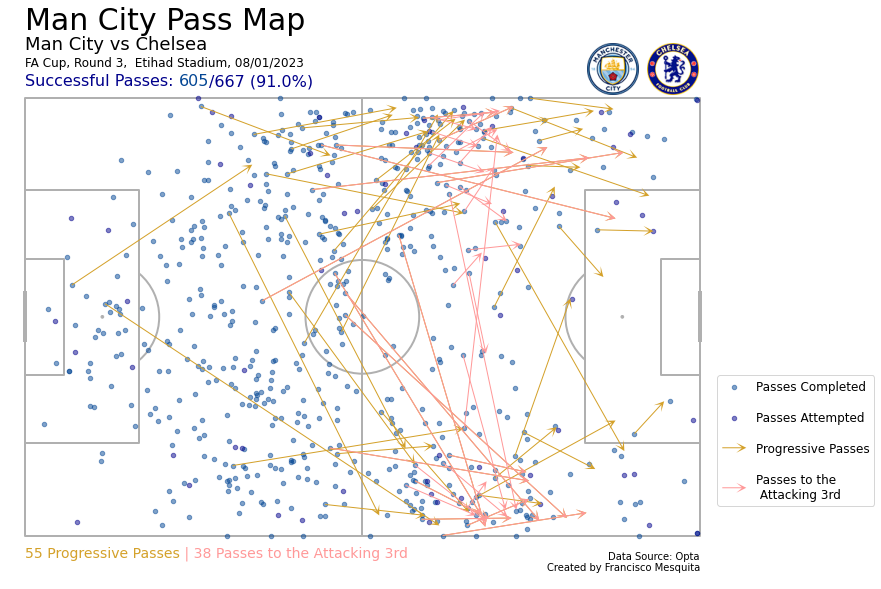

In [55]:
pitch = Pitch(pitch_type = 'opta')
fig, ax = pitch.grid(figheight = 8, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

city = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]
pass_succ = city[city.outcomeType_displayName == 'Successful']
pass_fail = city[city.outcomeType_displayName == 'Unsuccessful']

pass_succ_total = pass_succ[pass_succ.columns[0]].count() #number of successful passes
pass_fail_total = pass_fail[pass_fail.columns[0]].count() #number of unsuccessful passes
pass_total = pass_succ_total + pass_fail_total #number of total passes
pass_total_perc = round(100 * pass_succ_total/pass_total, 0)

prog = pass_prog[pass_prog.team_name == data['home']['name']]
#prog = pass_prog[pass_prog.team_name == data['away']['name']]
prog_succ = prog[prog.outcomeType_displayName == 'Successful']
prog_succ_Total = prog_succ[prog_succ.columns[0]].count()

atk3rd = pass_atk[pass_atk.team_name == data['home']['name']]
#atk3rd = pass_atk[pass_atk.team_name == data['away']['name']]
atk3rd_succ = atk3rd[atk3rd.outcomeType_displayName == 'Successful']
atk3rd_succ_Total = atk3rd_succ[atk3rd_succ.columns[0]].count()

pitch.scatter(pass_succ.x, pass_succ.y, s = 20, ax = ax['pitch'], color = cAway, alpha = 0.5, label = 'Passes Completed')
pitch.scatter(pass_fail.x, pass_fail.y, s = 20, ax = ax['pitch'], color = '#00008b', alpha = 0.5, label = 'Passes Attempted')
pitch.arrows(prog_succ.x, prog_succ.y, prog_succ.endX, prog_succ.endY, width = 1, headwidth = 10, headlength = 10, 
             color = '#D4A12A', ax = ax['pitch'], label = 'Progressive Passes')
pitch.arrows(atk3rd_succ.x, atk3rd_succ.y, atk3rd_succ.endX, atk3rd_succ.endY, width = 1, headwidth = 10, headlength = 10, 
             color = '#FF9999', ax = ax['pitch'], label = 'Passes to the \n Attacking 3rd')

# add a legend and title
legend = ax['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

ax['title'].text(0, 1.3, 'Man City Pass Map', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, .8, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, 0.4, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')
ax['title'].text(0, 0.0, 'Successful Passes: ', va = 'center', ha = 'left', fontsize = 16, color = '#00008b')
ax['title'].text(0.228, 0.0, str(pass_succ_total), va = 'center', ha = 'left', fontsize = 16, color = cAway)
ax['title'].text(0.273, 0.0, '/' + str(pass_total) + ' (' + str(pass_total_perc) + '%)', 
                 va = 'center', ha = 'left', fontsize = 16, color = '#00008b')
#ax['title'].text(0, 0.0, 'Successful Passes: ' + str(pass_succ_total) + '/' + str(pass_total) + ' (' 
#                 + str(pass_total_perc) + '%), va = 'center', ha = 'left', fontsize = 16, color = 'pink')
ax['endnote'].text(0., 1., str(prog_succ_Total) + ' Progressive Passes', 
                 va = 'center', ha = 'left', fontsize = 14, color = '#D4A12A')
ax['endnote'].text(0.23, 1., ' | ' + str(atk3rd_succ_Total) + ' Passes to the Attacking 3rd', 
                 va = 'center', ha = 'left', fontsize = 14, color = '#FF9999')
#ax['endnote'].text(0, 1., str(prog_succ_Total) + ' Progressive Passes' + ' | ' + str(atk3rd_succ_Total) 
#                   + ' Passes to the Attacking 3rd', va = 'center', ha = 'left', fontsize = 14, color = 'pink')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.87, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.87, width = 0.07, height = 0.09)

ax['endnote'].text(1, 0.9, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 0.5, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

# Defensive Actions

In [56]:
df_def = df[df.type_displayName.isin(['Clearance', 'Interception', 'BlockedPass', 'Tackle', 'BallRecovery', 'Aerial'])]
df_def['team_name'] = df_def.teamId.apply(lambda x: team_dict[x])
df_def['player_name'] = df_def.playerId.apply(lambda x: player_dict[x])

In [57]:
Clearance = df[df.type_displayName == 'Clearance'].reset_index()
Clearance['team_name'] = Clearance.teamId.apply(lambda x: team_dict[x])
Clearance['player_name'] = Clearance.playerId.apply(lambda x: player_dict[x])
Clearance = Clearance[Clearance.outcomeType_displayName == 'Successful']
Clearance = Clearance[Clearance.team_name == 'Man City']
Clear_Total = Clearance[Clearance.columns[0]].count()
print(str(Clear_Total) + ' Clearances')

Interception = df[df.type_displayName == 'Interception'].reset_index()
Interception['team_name'] = Interception.teamId.apply(lambda x: team_dict[x])
Interception['player_name'] = Interception.playerId.apply(lambda x: player_dict[x])
Interception = Interception[Interception.outcomeType_displayName == 'Successful']
Interception = Interception[Interception.team_name == 'Man City']
Intercep_Total = Interception[Interception.columns[0]].count()
print(str(Intercep_Total) + ' Interceptions')

BlockedPass = df[df.type_displayName == 'BlockedPass'].reset_index()
BlockedPass['team_name'] = BlockedPass.teamId.apply(lambda x: team_dict[x])
BlockedPass['player_name'] = BlockedPass.playerId.apply(lambda x: player_dict[x])
BlockedPass = BlockedPass[BlockedPass.outcomeType_displayName == 'Successful']
BlockedPass = BlockedPass[BlockedPass.team_name == 'Man City']
BlockPass_Total = BlockedPass[BlockedPass.columns[0]].count()
print(str(BlockPass_Total) + ' Blocked Passes')

Tackle = df[df.type_displayName == 'Tackle'].reset_index()
Tackle['team_name'] = Tackle.teamId.apply(lambda x: team_dict[x])
Tackle['player_name'] = Tackle.playerId.apply(lambda x: player_dict[x])
Tackle = Tackle[Tackle.outcomeType_displayName == 'Successful']
Tackle = Tackle[Tackle.team_name == 'Man City']
Tackle_Total = Tackle[Tackle.columns[0]].count()
print(str(Tackle_Total) + ' Tackles')

BallRecovery = df[df.type_displayName == 'BallRecovery'].reset_index()
BallRecovery['team_name'] = BallRecovery.teamId.apply(lambda x: team_dict[x])
BallRecovery['player_name'] = BallRecovery.playerId.apply(lambda x: player_dict[x])
BallRecovery = BallRecovery[BallRecovery.outcomeType_displayName == 'Successful']
BallRecovery = BallRecovery[BallRecovery.team_name == 'Man City']
BallRecover_Total = BallRecovery[BallRecovery.columns[0]].count()
print(str(BallRecover_Total) + ' Ball Recoveries')

Aerial = df[df.type_displayName == 'Aerial'].reset_index()
AerialWon = Aerial[Aerial.outcomeType_displayName == 'Successful']
AerialWon['team_name'] = AerialWon.teamId.apply(lambda x: team_dict[x])
AerialWon['player_name'] = AerialWon.playerId.apply(lambda x: player_dict[x])
AerialWon = AerialWon[AerialWon.outcomeType_displayName == 'Successful']
AerialWon = AerialWon[AerialWon.team_name == 'Man City']
AerialWon_Total = AerialWon[AerialWon.columns[0]].count()
print(str(AerialWon_Total) + ' Aerial Duels Won')

7 Clearances
5 Interceptions
5 Blocked Passes
17 Tackles
50 Ball Recoveries
3 Aerial Duels Won


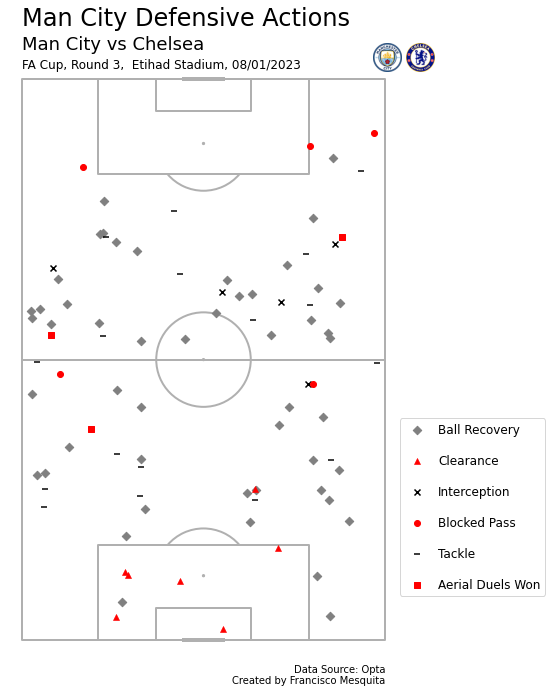

In [58]:
pitch = VerticalPitch(pitch_type = 'opta')
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

pitch.scatter(BallRecovery.x, BallRecovery.y, c = 'grey', edgecolors = 'grey',
              marker = 'D', ax = axs['pitch'], zorder = 2, label = 'Ball Recovery')

pitch.scatter(Clearance.x, Clearance.y, edgecolors = 'red', linewidth = 0.6, c = 'red', 
             marker = '^', ax = axs['pitch'], zorder = 2, label = 'Clearance')

pitch.scatter(Interception.x, Interception.y, c = 'black', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Interception')

pitch.scatter(BlockedPass.x, BlockedPass.y, c = 'red', edgecolors = 'red',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Blocked Pass')

pitch.scatter(Tackle.x, Tackle.y, c = 'black', edgecolors = 'black',
              marker = '_', ax = axs['pitch'], zorder = 2, label = 'Tackle')

pitch.scatter(AerialWon.x, AerialWon.y, c = 'red', edgecolors = 'red',
              marker = 's', ax = axs['pitch'], zorder = 2, label = 'Aerial Duels Won')

axs['title'].text(0, 0.8, 'Man City Defensive Actions', va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.91, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.99, bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

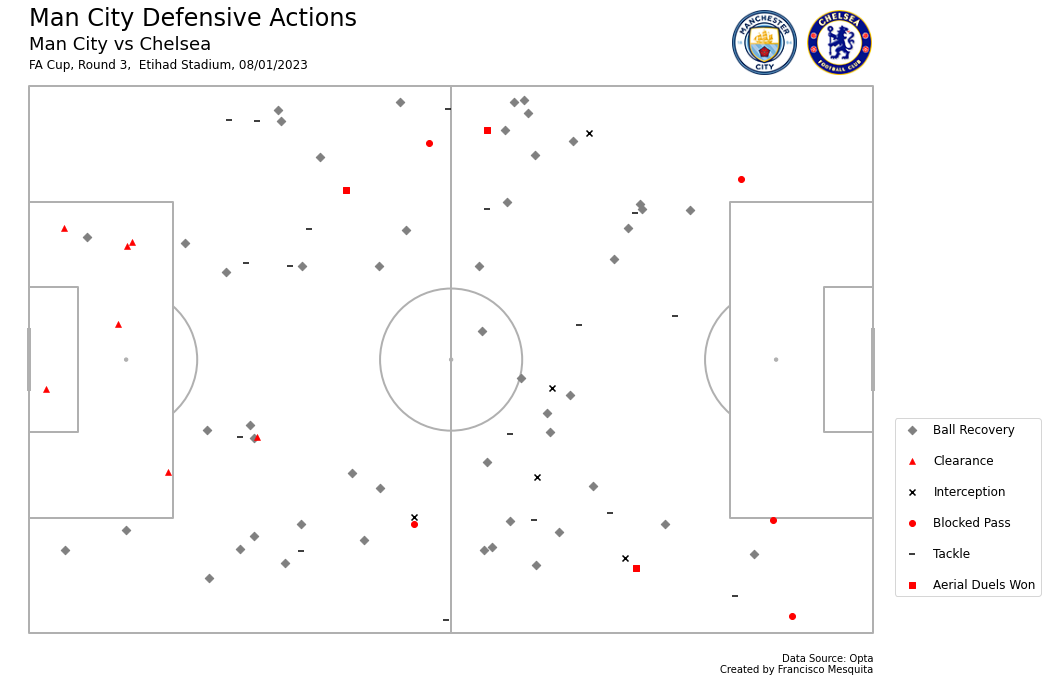

In [59]:
pitch = Pitch(pitch_type = 'opta')
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

pitch.scatter(BallRecovery.x, BallRecovery.y, c = 'grey', edgecolors = 'grey',
              marker = 'D', ax = axs['pitch'], zorder = 2, label = 'Ball Recovery')

pitch.scatter(Clearance.x, Clearance.y, edgecolors = 'red', linewidth = 0.6, c = 'red', 
             marker = '^', ax = axs['pitch'], zorder = 2, label = 'Clearance')

pitch.scatter(Interception.x, Interception.y, c = 'black', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Interception')

pitch.scatter(BlockedPass.x, BlockedPass.y, c = 'red', edgecolors = 'red',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Blocked Pass')

pitch.scatter(Tackle.x, Tackle.y, c = 'black', edgecolors = 'black',
              marker = '_', ax = axs['pitch'], zorder = 2, label = 'Tackle')

pitch.scatter(AerialWon.x, AerialWon.y, c = 'red', edgecolors = 'red',
              marker = 's', ax = axs['pitch'], zorder = 2, label = 'Aerial Duels Won')

axs['title'].text(0, 0.8, 'Man City Defensive Actions', va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(0, 0.35, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (1.,.1), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.88, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.88, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.9, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.6, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

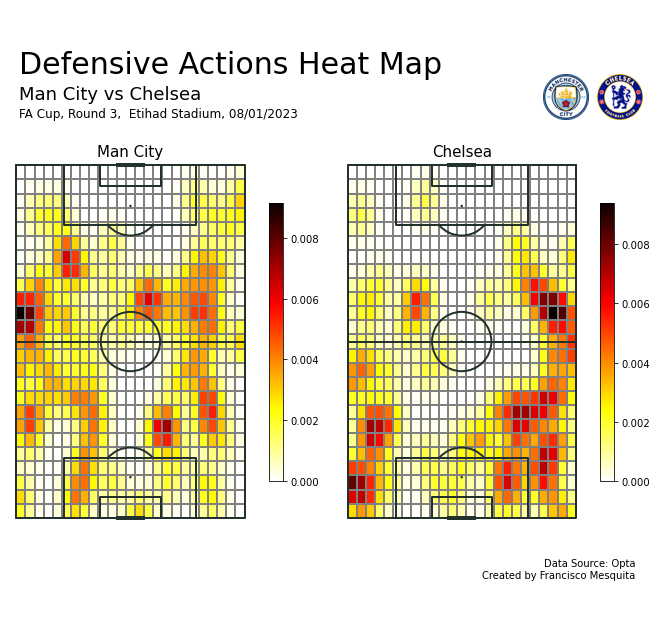

In [60]:
pitch = VerticalPitch(pitch_type= 'opta', line_color = '#22312b')
fig, ax = pitch.grid(ncols = 2, axis = False,)
fig.set_facecolor("white")

# Home Team
home = df_def[df_def.team_name == data['home']['name']]
bin_statistic = pitch.bin_statistic(home.x, home.y, statistic= 'count', bins = (25, 25), normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

hm = pitch.heatmap(bin_statistic, ax = ax['pitch'][0], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(hm, ax = ax['pitch'][0], shrink = 0.6)
ax['pitch'][0].text(50, 104, data['home']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

# Away Team
away = df_def[df_def.team_name == data['away']['name']]
bin_statistic = pitch.bin_statistic(away.x, away.y, statistic = 'count', bins = (25, 25), normalize = True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)

am = pitch.heatmap(bin_statistic, ax = ax['pitch'][1], cmap = 'hot_r', edgecolors = 'gray', zorder = 0)
cbar = fig.colorbar(am, ax = ax['pitch'][1], shrink = 0.6)
ax['pitch'][1].text(50, 104, data['away']['name'], va = 'center', ha = 'center', fontsize = 15, color = 'black')

ax['title'].text(0, 0.4, 'Defensive Actions Heat Map', va = 'center', ha = 'left', fontsize = 30, color = 'black')
ax['title'].text(0, 0.1, data['home']['name'] + ' vs ' + data['away']['name'], 
                 va = 'center', ha = 'left', fontsize = 18, color = 'black')
ax['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                 va = 'center', ha = 'left', fontsize = 12, color = 'black')

# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.8, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.9, bottom = 0.8, width = 0.07, height = 0.07)

ax['endnote'].text(1, 1.4, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
ax['endnote'].text(1, 1.1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

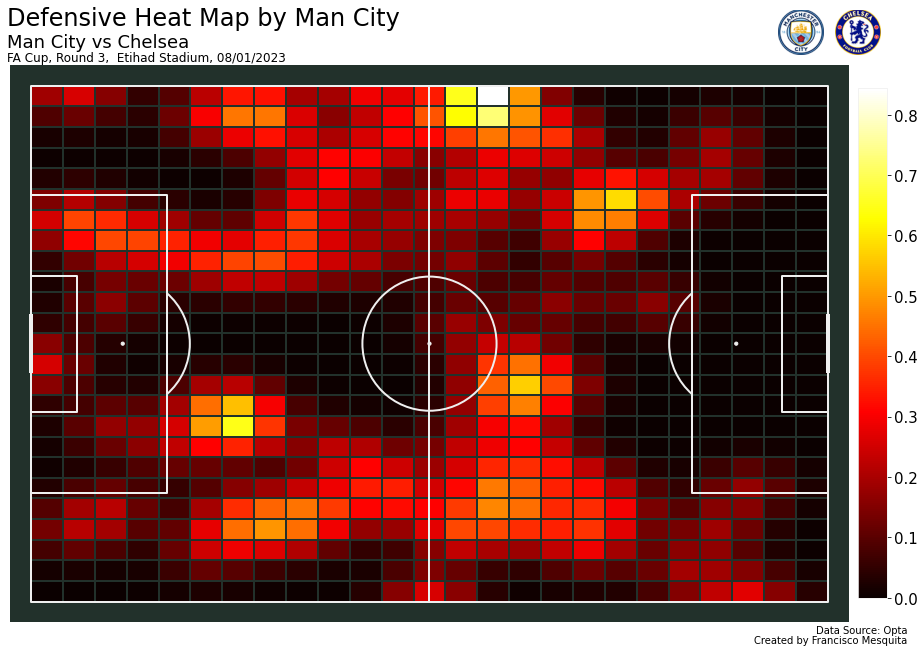

In [61]:
pitch = Pitch(pitch_type = 'opta', line_zorder = 2, pitch_color = '#22312b', line_color = '#efefef')
fig, axs = pitch.grid(endnote_height = 0.03, endnote_space = 0, grid_width = 0.88, left = 0.025,
                      title_height = 0.06, title_space = 0, axis = False, grid_height = 0.86)
fig.set_facecolor('white')

city = df_def[df_def.team_name == data['home']['name']]
#city = df_def[df_def.team_name == data['away']['name']]

# plot heatmap
bin_statistic = pitch.bin_statistic(city.x, city.y, statistic = 'count', bins = (25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax = axs['pitch'], cmap = 'hot', edgecolors = '#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax = ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color = 'black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color = 'black')
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(15)

axs['title'].text(-0.03, 1.2, 'Defensive Heat Map by ' + data['home']['name'], 
#axs['title'].text(-0.03, 1.2, 'Defensive Heat Map by ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(-0.03, 0.6, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(-0.03, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')    
    
# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.93, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.93, width = 0.07, height = 0.07)

axs['endnote'].text(1.1, .6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1.1, .1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

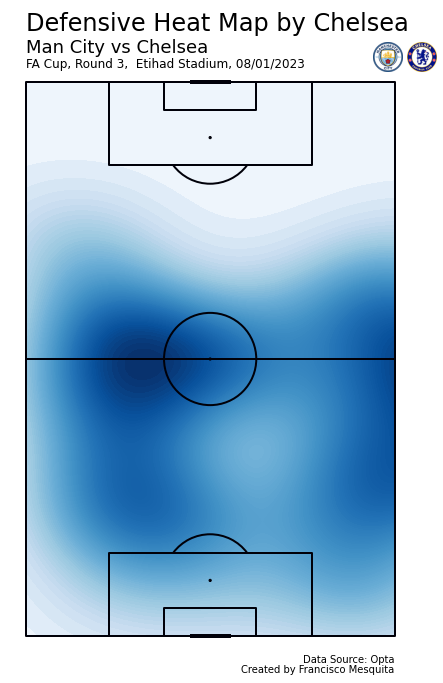

In [63]:
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, title_space = 0,
                      axis = False, grid_height = 0.82, endnote_height = 0.03)
fig.set_facecolor('white')

pitch = VerticalPitch(line_color = '#000009', line_zorder = 1)

city = df_def[df_def.team_name == data['home']['name']]
#city = df_def[df_def.team_name == data['away']['name']]

kde_HD = pitch.kdeplot(city.x, city.y, ax = axs['pitch'], shade = True, levels = 100, 
                       shade_lowest = True, cut = 4, cmap = 'Blues')

#axs['title'].text(0, 0.7, 'Defensive Heat Map by ' + data['home']['name'], 
axs['title'].text(0, 0.7, 'Defensive Heat Map by ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(0, 0.3, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, 0., comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

axs['endnote'].text(1, 0.8, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.07)
add_image(Image.open(pAway), fig, 
          left = 0.96, bottom = 0.86, width = 0.07, height = 0.07)

plt.show()

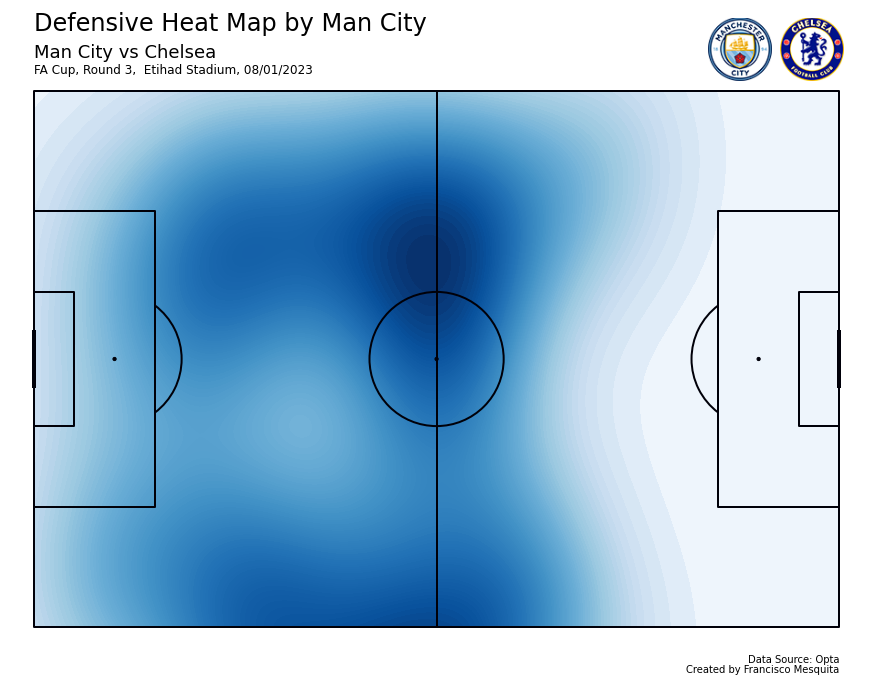

In [65]:
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, title_space = 0,
                      axis = False, grid_height = 0.82, endnote_height = 0.03)
fig.set_facecolor('white')

pitch = Pitch(line_color = '#000009', line_zorder = 1)

city = df_def[df_def.team_name == data['home']['name']]
#city = df_def[df_def.team_name == data['away']['name']]

kde_HD = pitch.kdeplot(city.x, city.y, ax = axs['pitch'], shade = True, levels = 100, 
                       shade_lowest = True, cut = 4, cmap = 'Blues')

axs['title'].text(0, 0.7, 'Defensive Heat Map by ' + data['home']['name'], 
#axs['title'].text(0, 0.7, 'Defensive Heat Map by ' + data['away']['name'],  
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.1, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')


axs['endnote'].text(1, 0.8, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

plt.show()

# Offensive Actions - Shot Map

In [66]:
Opp = 'Chelsea'

MissedShots = df[df.type_displayName == 'MissedShots'].reset_index()
MissedShots['team_name'] = MissedShots.teamId.apply(lambda x: team_dict[x])
MissedShots['player_name'] = MissedShots.playerId.apply(lambda x: player_dict[x])
MissedShots = MissedShots[MissedShots.team_name == 'Man City']
MissedShots_Total = MissedShots[MissedShots.columns[0]].count()
print(str(MissedShots_Total) + ' Missed Shots (Off Target)')

ShotOnPost = df[df.type_displayName == 'ShotOnPost'].reset_index()
ShotOnPost['team_name'] = ShotOnPost.teamId.apply(lambda x: team_dict[x])
ShotOnPost['player_name'] = ShotOnPost.playerId.apply(lambda x: player_dict[x])
ShotOnPost = ShotOnPost[ShotOnPost.team_name == 'Man City']
ShotOnPost_Total = ShotOnPost[ShotOnPost.columns[0]].count()
print(str(ShotOnPost_Total) + ' Shots on Post')

SavedShot = df[df.type_displayName == 'SavedShot'].reset_index()
SavedShot['team_name'] = SavedShot.teamId.apply(lambda x: team_dict[x])
SavedShot['player_name'] = SavedShot.playerId.apply(lambda x: player_dict[x])
SavedShot = SavedShot[SavedShot.team_name == 'Man City']
SavedShot_Total = SavedShot[SavedShot.columns[0]].count()
print(str(SavedShot_Total) + ' Saved Shots')

Missed = df[df.type_displayName.isin(['MissedShots', 'ShotOnPost', 'SavedShot'])]
Missed['team_name'] = Missed.teamId.apply(lambda x: team_dict[x])
Missed['player_name'] = Missed.playerId.apply(lambda x: player_dict[x])
Missed = Missed[Missed.team_name == 'Man City']
Missed_Total = Missed[Missed.columns[0]].count()
print(str(Missed_Total) + ' Total Missed Shots')

Goal = df[df.type_displayName == 'Goal'].reset_index()
Goal['team_name'] = Goal.teamId.apply(lambda x: team_dict[x])
Goal['player_name'] = Goal.playerId.apply(lambda x: player_dict[x])
#OwnGoal = Goal[Goal.team_name == Opp]
#OwnGoal_Total = OwnGoal[OwnGoal.columns[0]].count()
Goal = Goal[Goal.team_name == 'Man City']
Goal_Total = Goal[Goal.columns[0]].count()
print(str(Goal_Total) + ' Goals')
#print(str(OwnGoal_Total) + ' Own Goal')

2 Missed Shots (Off Target)
0 Shots on Post
3 Saved Shots
5 Total Missed Shots
4 Goals


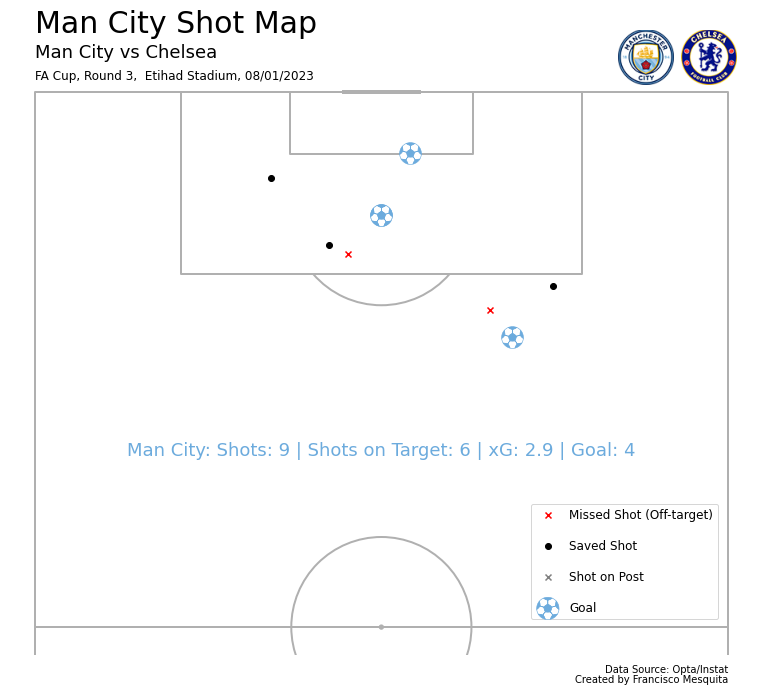

In [71]:
pitch = VerticalPitch(pitch_type = 'opta', half = True)
fig, axs = pitch.grid(figheight = 10, title_height = 0.08, endnote_space = 0, axis = False, 
                      title_space = 0, grid_height = 0.82, endnote_height = 0.05)
fig.set_facecolor("white")

#pitch.scatter(100-OwnGoal.x, OwnGoal.y, edgecolors = 'red', linewidth = 0.6, c = 'white', 
#            marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Own Goal')

pitch.scatter(MissedShots.x, MissedShots.y, c = 'red', edgecolors = 'red',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Missed Shot (Off-target)')

pitch.scatter(SavedShot.x, SavedShot.y, c = 'black', edgecolors = 'black',
              marker = 'o', ax = axs['pitch'], zorder = 2, label = 'Saved Shot')

pitch.scatter(ShotOnPost.x, ShotOnPost.y, c = 'grey', edgecolors = 'black',
              marker = 'x', ax = axs['pitch'], zorder = 2, label = 'Shot on Post')

pitch.scatter(Goal.x, Goal.y, edgecolors = cHome, linewidth = 0.6, c = 'white', 
#pitch.scatter(Goal.x, Goal.y, edgecolors = cAway, linewidth = 0.6, c = 'white', 
             marker = 'football', ax = axs['pitch'], zorder = 2, label = 'Goal')

axs['title'].text(0, 0.7, 'Man City Shot Map', va = 'center', ha = 'left', fontsize = 30, color = 'black')
axs['title'].text(0, 0.2, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(0, -0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')

# add a legend and title
legend = axs['pitch'].legend(loc = (0.7,.06), labelspacing = 1.5, fontsize = 12, labelcolor = 'black')

add_image(Image.open(pHome), fig, 
          left = 0.8, bottom = 0.86, width = 0.07, height = 0.09)
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.86, width = 0.07, height = 0.09)

axs['endnote'].text(1, 0.6, 'Data Source: Opta/Instat', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1, 0.3, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')


axs['title'].text(0.5, -6.7, "Man City: Shots: 9 | Shots on Target: 6 | xG: 2.9 | Goal: 4", 
                 color = cHome, va = 'center', ha = 'center', fontsize = 18)
#                 color = cAway, va = 'center', ha = 'center', fontsize = 18)

plt.show()

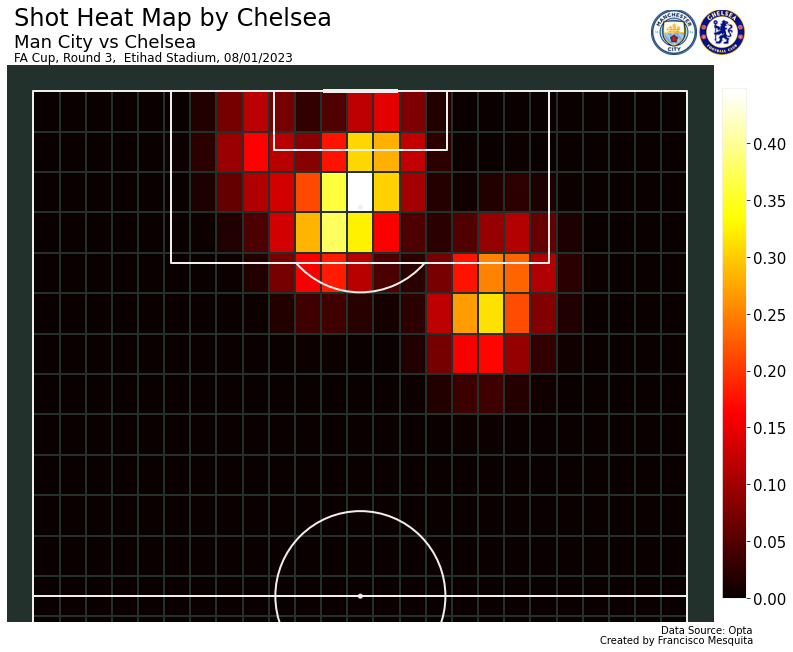

In [69]:
pitch = VerticalPitch(pitch_type = 'opta', line_zorder = 2, pitch_color = '#22312b', line_color = '#efefef', half = True)
fig, axs = pitch.grid(endnote_height = 0.03, endnote_space = 0, grid_width = 0.88, left = 0.025,
                      title_height = 0.06, title_space = 0, axis = False, grid_height = 0.86)
fig.set_facecolor('white')

# plot heatmap
bin_statistic = pitch.bin_statistic(Shot.x, Shot.y, statistic = 'count', bins = (25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax = axs['pitch'], cmap = 'hot', edgecolors = '#22312b')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax = ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color = 'black')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color = 'black')
for label in cbar.ax.get_yticklabels():
    label.set_fontsize(15)

#axs['title'].text(-0.03, 1.2, 'Shot Heat Map by ' + data['home']['name'], 
axs['title'].text(-0.03, 1.2, 'Shot Heat Map by ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 24, color = 'black')
axs['title'].text(-0.03, 0.6, data['home']['name'] + ' vs ' + data['away']['name'], 
                  va = 'center', ha = 'left', fontsize = 18, color = 'black')
axs['title'].text(-0.03, 0.2, comp + ', ' + stage + ', ' + venue + ', ' + date, 
                  va = 'center', ha = 'left', fontsize = 12, color = 'black')    
    
# Home
add_image(Image.open(pHome), fig, 
          left = 0.82, bottom = 0.93, width = 0.07, height = 0.07)
# Away
add_image(Image.open(pAway), fig, 
          left = 0.88, bottom = 0.93, width = 0.07, height = 0.07)

axs['endnote'].text(1.1, .6, 'Data Source: Opta', va = 'center', ha = 'right', color = 'black')
axs['endnote'].text(1.1, .1, 'Created by Francisco Mesquita', va = 'center', ha = 'right', color = 'black')

plt.show()

In [74]:
city = pass_data[pass_data.team_name == data['home']['name']]
#city = pass_data[pass_data.team_name == data['away']['name']]
city_succ = city[city.outcomeType_displayName == 'Successful']
city_fail = city[city.outcomeType_displayName == 'Unsuccessful']

In [86]:
player1_succ = city_succ[city_succ.player_name == 'Stefan Ortega']
player1_fail = city_fail[city_fail.player_name == 'Stefan Ortega']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_fail_total + player1_succ_total
player1_succ_perc = round(100 * player1_succ_total / player1_total, 2)
print(player1_succ_total, ' Successful Passes out of ', player1_total, ' Attempts, ', player1_succ_perc, '%')

37  Successful Passes out of  42  Attempts,  88.1 %


In [87]:
player1_succ = city_succ[city_succ.player_name == 'Kyle Walker']
player1_fail = city_fail[city_fail.player_name == 'Kyle Walker']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_fail_total + player1_succ_total
player1_succ_perc = round(100 * player1_succ_total / player1_total, 2)
print(player1_succ_total, ' Successful Passes out of ', player1_total, ' Attempts, ', player1_succ_perc, '%')

68  Successful Passes out of  75  Attempts,  90.67 %


In [88]:
player1_succ = city_succ[city_succ.player_name == 'Manuel Akanji']
player1_fail = city_fail[city_fail.player_name == 'Manuel Akanji']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_fail_total + player1_succ_total
player1_succ_perc = round(100 * player1_succ_total / player1_total, 2)
print(player1_succ_total, ' Successful Passes out of ', player1_total, ' Attempts, ', player1_succ_perc, '%')

79  Successful Passes out of  82  Attempts,  96.34 %


In [89]:
player1_succ = city_succ[city_succ.player_name == 'Aymeric Laporte']
player1_fail = city_fail[city_fail.player_name == 'Aymeric Laporte']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_fail_total + player1_succ_total
player1_succ_perc = round(100 * player1_succ_total / player1_total, 2)
print(player1_succ_total, ' Successful Passes out of ', player1_total, ' Attempts, ', player1_succ_perc, '%')

104  Successful Passes out of  108  Attempts,  96.3 %


In [105]:
player1_succ = city_succ[city_succ.player_name == 'Sergio Gómez']
player1_fail = city_fail[city_fail.player_name == 'Sergio Gómez']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_fail_total + player1_succ_total
player1_succ_perc = round(100 * player1_succ_total / player1_total, 2)
print(player1_succ_total, ' Successful Passes out of ', player1_total, ' Attempts, ', player1_succ_perc, '%')

39  Successful Passes out of  45  Attempts,  86.67 %


In [92]:
player1_succ = city_succ[city_succ.player_name == 'Bernardo Silva']
player1_fail = city_fail[city_fail.player_name == 'Bernardo Silva']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_fail_total + player1_succ_total
player1_succ_perc = round(100 * player1_succ_total / player1_total, 2)
print(player1_succ_total, ' Successful Passes out of ', player1_total, ' Attempts, ', player1_succ_perc, '%')

51  Successful Passes out of  54  Attempts,  94.44 %


In [93]:
player1_succ = city_succ[city_succ.player_name == 'Rodri']
player1_fail = city_fail[city_fail.player_name == 'Rodri']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_fail_total + player1_succ_total
player1_succ_perc = round(100 * player1_succ_total / player1_total, 2)
print(player1_succ_total, ' Successful Passes out of ', player1_total, ' Attempts, ', player1_succ_perc, '%')

49  Successful Passes out of  50  Attempts,  98.0 %


In [94]:
player1_succ = city_succ[city_succ.player_name == 'Phil Foden']
player1_fail = city_fail[city_fail.player_name == 'Phil Foden']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_fail_total + player1_succ_total
player1_succ_perc = round(100 * player1_succ_total / player1_total, 2)
print(player1_succ_total, ' Successful Passes out of ', player1_total, ' Attempts, ', player1_succ_perc, '%')

30  Successful Passes out of  37  Attempts,  81.08 %


In [95]:
player1_succ = city_succ[city_succ.player_name == 'Riyad Mahrez']
player1_fail = city_fail[city_fail.player_name == 'Riyad Mahrez']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_fail_total + player1_succ_total
player1_succ_perc = round(100 * player1_succ_total / player1_total, 2)
print(player1_succ_total, ' Successful Passes out of ', player1_total, ' Attempts, ', player1_succ_perc, '%')

40  Successful Passes out of  50  Attempts,  80.0 %


In [98]:
player1_succ = city_succ[city_succ.player_name == 'Julián Álvarez']
player1_fail = city_fail[city_fail.player_name == 'Julián Álvarez']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_fail_total + player1_succ_total
player1_succ_perc = round(100 * player1_succ_total / player1_total, 2)
print(player1_succ_total, ' Successful Passes out of ', player1_total, ' Attempts, ', player1_succ_perc, '%')

15  Successful Passes out of  18  Attempts,  83.33 %


In [99]:
player1_succ = city_succ[city_succ.player_name == 'Cole Palmer']
player1_fail = city_fail[city_fail.player_name == 'Cole Palmer']

player1_succ_total = player1_succ[player1_succ.columns[0]].count() #number of successful passes
player1_fail_total = player1_fail[player1_fail.columns[0]].count() #number of unsuccessful passes
player1_total = player1_fail_total + player1_succ_total
player1_succ_perc = round(100 * player1_succ_total / player1_total, 2)
print(player1_succ_total, ' Successful Passes out of ', player1_total, ' Attempts, ', player1_succ_perc, '%')

37  Successful Passes out of  46  Attempts,  80.43 %
